In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import openpathsampling as paths

In [2]:
storage = paths.AnalysisStorage("mistis.nc")

In [3]:
mistis = storage.networks.load(0)

In [4]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)

True <openpathsampling.ensemble.TISEnsemble object at 0x122445990>
True <openpathsampling.ensemble.TISEnsemble object at 0x122445cd0>
True <openpathsampling.ensemble.TISEnsemble object at 0x122532810>


In [5]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [6]:
scheme = storage.schemes[0]
scheme.move_summary(storage)

ms_outer_shooting ran 6.3122923588% of the cycles with acceptance 16/19 (0.842105263158)
repex ran 21.926910299% of the cycles with acceptance 33/66 (0.5)
shooting ran 42.8571428571% of the cycles with acceptance 88/129 (0.682170542636)
minus ran 1.32890365449% of the cycles with acceptance 3/4 (0.75)
pathreversal ran 27.2425249169% of the cycles with acceptance 49/82 (0.59756097561)


In [7]:
for trans in mistis.transitions.values():
    trans._flux = 1.0

In [8]:
mistis.rate_matrix(storage, force=True)

,"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})"
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",0.5,NaN,0.256062
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",NaN,0.15681,NaN


In [9]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

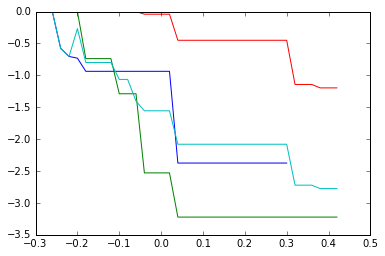

In [10]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp))